###Variational Inference

**Variational Inference (VI)** is another important approach to approximate inference algorithms, with the basic idea of choosing an approximate distribution q(x) from a set of tractable or easy-to-compute distributions with trainable parameters and make this approximation as close as possible to the true distribution p(x).

In the mean-field we approximate q(x) that can take on a fully factored representation of the joint posterior distribution. The KL divergence measure how close is our approximate distribution to the true posterior. Optimizing the KL divergence makes the VI an optimization problem.

The image denoising is one example to go over these concepts. We derive the evidence for lower bound (ELBO) and implement the approximation of mean-field for image denoising.

**KL Divergence**


$$
D_{KL}(q \parallel p) = \sum_{x \in \mathcal{X}} q(x) \log\left(\frac{q(x)}{p(x)}\right)
$$

If our target distribution is a standard univariate normal distribution $p(x) \sim N(0,1)$ and our approximating distribution is a univariate normal, with mean mu and variance $sigma^2, q(x) \sim N(mu, sigma^2)$, we can compute $KL(q||p)$ as

$$
D_{KL}(q \parallel p) = \int q(x) \log\left(\frac{q(x)}{p(x)}\right) dx = -\int q(x)\log(p(x)) dx + \int q(x)\log(q(x)) dx
$$

$$
D_{KL}(q \parallel p) = -\frac{1}{2}\left(1 + \log(\sigma^2) - \mu^2 - \sigma^2\right)
$$

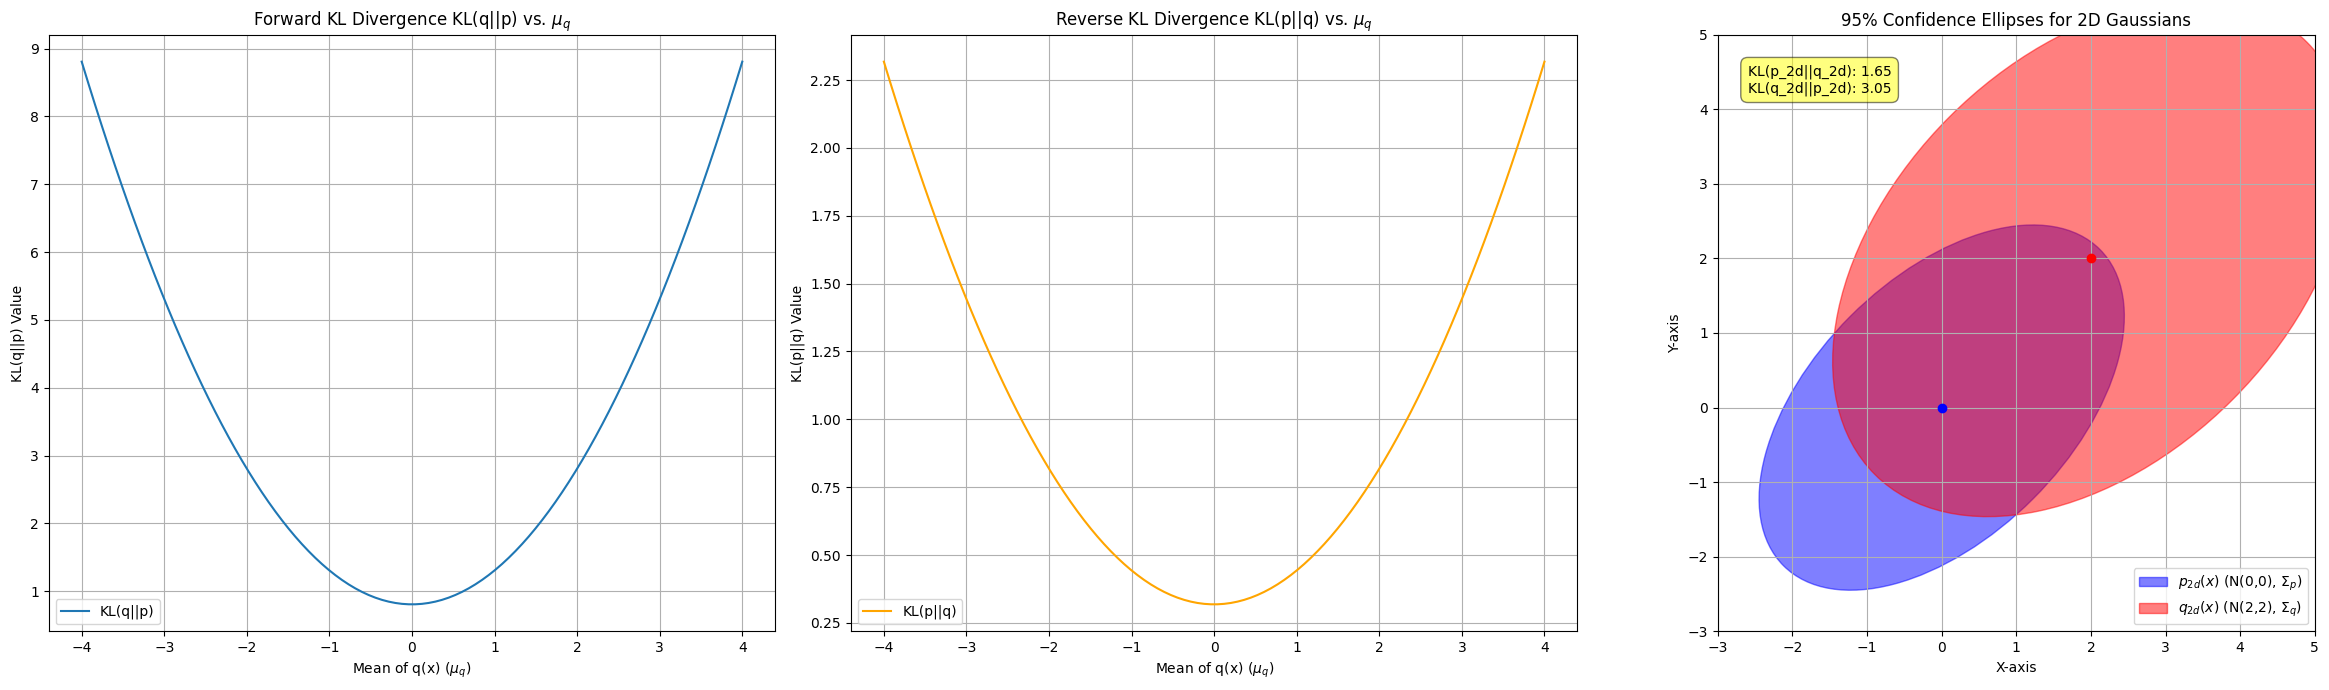

Generated a single figure with three subplots: 1D KL divergences and 2D Gaussian ellipses.


In [ ]:
""" 1D KL divergences and 2D Gaussian ellipses
KL divergence plotting
KL(q||p) and K(p||q) for p(x) and q(x) where p(x) ~ N(0,1) and q(x) ~ N(mu, 4) -- we can go with a fixed sigma^2 =4 and mean in [-4,4]
Forward KL left q(x) and Reverse KL right p(x)
"""

Let $p_hat(x) = p(x)/Z$ be the unnormalized distribution. Consider
$$
\begin{aligned}
J(q) = D_{KL}(q \parallel \hat{p}) &= \sum_{x} q(x) \log \left( \frac{q(x)}{p(x)Z} \right)
= \sum_{x} q(x) \log \left( \frac{q(x)}{p(x)} \right) - \log Z
= D_{KL}(q \parallel p) - \log Z
\end{aligned}
$$
<br>


With KL nonnegative, **$J(q)$ is an upper bound on the marginal likelihood**. When $q(x)$ equals the posterior the KL vanishes.
$$
J(q) = D_{KL}(q \parallel p) - \log Z \geq -\log Z = -\log p(D)
$$
<br>


The optimal value $J(q\star)$ equals the log partition function, and for all other values of $q$, it yields a bound. $J(q)$ is called **the variational free energy**
$$
\min_{q} J(q) = \mathbb{E}_{q}[\log q(x)] + \mathbb{E}_{q}[-\log \hat{p}(x)] = -H(q) + \mathbb{E}_{q}[E(x)]
$$
<br>


**This is term from statistical physics**, the first term acts as a regularizer by encouraging maximum entropy and the second term is the expected energy and encourages the variational distribution q to explain data.
<br>


The reverse Kl acts as a penalty term known as the information projection or **I-projection**, and the forward KL is known as moment projection known as **M-projection**.
<br>


In our example with $2D$ gaussian mixture with four components, $p(x)$ and density ellipses of approximating distribution $q(x)$, we can see that the optimization for forward KL leadsto $q(x)$ centered at zero (low density region) and the optimization for reverse KL leads to $q(x)$ centered at one of the of the modes of gaussian mixture.
<br>


We use **Jensen inequality** to derive **ELBO**, an objective to maximize to learn the variational parameters of our model.
Let $x$ be our data, and z be the latent variables, then we can derive ELBO
<br>


$$
\log p(x) = \log \left( \sum_{z} p(x, z) \right) \geq \mathbb{E}_{q(z)}[\log p(x, z)] - \mathbb{E}_{q(z)}[\log q(z)] = \text{ELBO}
$$

**ELBO = Energy term + Entropy term**.


A good posterior must assign most of its probability to mass regions of low energy.


One form of **ELBO** emphasizes that the lower bound becomes tighter as the variational distribution better approximates the posterior.
$$
\text{ELBO} = -D_{KL}(q(z) \parallel p(z|x)) + \log p(x)
$$
<br>


We improve the **ELBO** by improving the model log evidence log(p(x)) through the prior p(z) or the likelihood p(z|x) or by improving the variational posterior approximation q(z).


$$ \text{ELBO} = \frac{1}{n} \sum_{i=1}^{n} \left[ \mathbb{E}_{q(z_i)}[\log p(x_i | z_i)] - D_{KL}(q(z_i) \parallel p(z_i)) \right]
$$


$$
\text{ELBO} = \frac{1}{n} \sum_{i=1}^{n} \underbrace{\left[ \text{Sample likelihood} - \text{Distance between } q(z) \text{ and } p(z) \right]}_{\text{per sample}}
$$
<br>

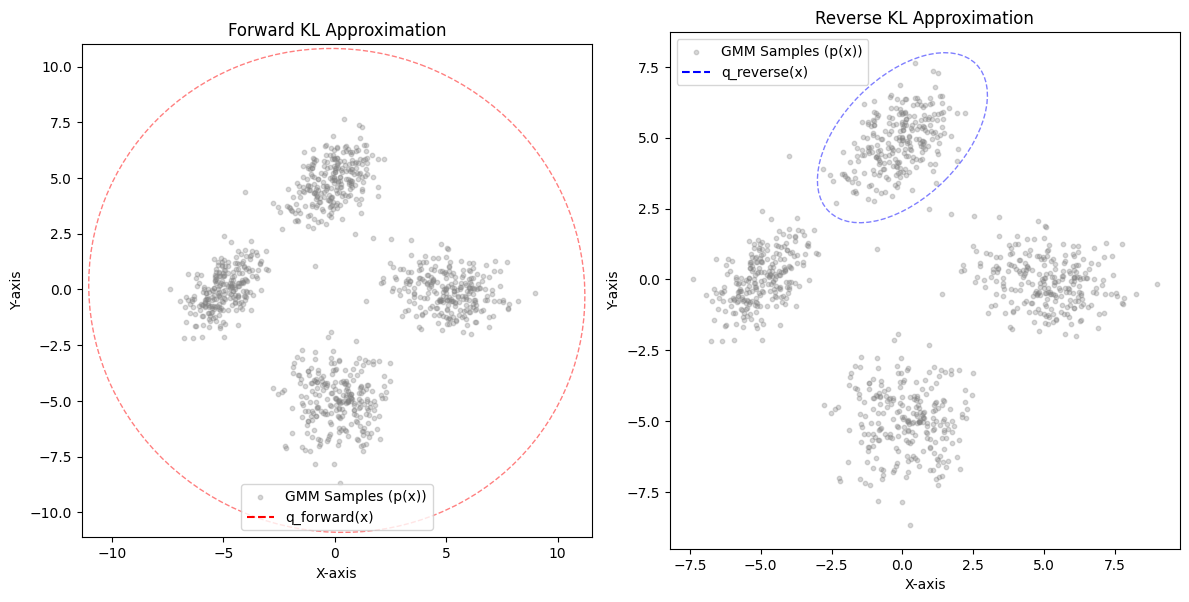

In [ ]:
"""
Given p(x) ~ N(0,1) and q(x) ~ N(mu, 4) - plot samples from 2D gaussian mixture with four components p(x) as well as density ellipses of approximating distribution q(x)
Visualize Forward KL (left) q(x) overestimates the support, while reverse KL (right) q(x) locks onto a mode
"""

**Variational Inference Demo** approximates a complex, non-standard distribution using a simple Gaussian $q(\theta)$, illustrating the "optimization" process.

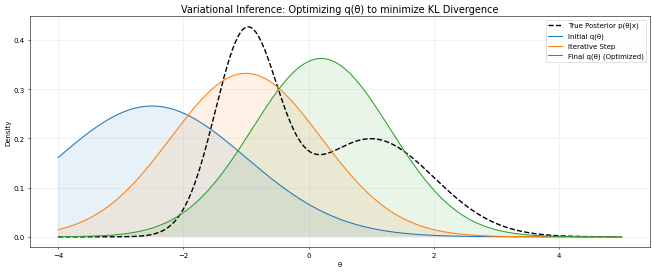

In [ ]:
""" Variational Inference: Optimizing q(θ) to minimize KL

 1. Target Posterior (The "complex" distribution we want to approximate) - Often skewed or multi-modal; here we use a skewed Gaussian-like shape
 2. Variational Approximation q(theta) - We optimize the mean (mu) and scale (sigma) of a single Gaussian
"""

###Mean field approximation - Image denoising

Mean field approximation is a popular form of VI where we assume the posterior is a fully factorized approximation of the form.
$$q(\mathbf{x}) = \prod_{i=1}^{M} q_i(x_i)$$

For a distribution with n variables $x1, x2, .., xn$ we have true posterior $p(x1, x2, ... , xn)$ that we are attempting to approximate by a fully factored distribution $q(x1)q(x2)q(x3)$. Our goal is to minimize variational energy $J(q)$ or equivalently maximize the lower bound.
$$L(q) = -J(q) = \sum_{x} q(x) \log\left(\frac{\hat{p}(x)}{q(x)}\right)$$


We can rewrite the objective for each marginal distribution $qj$, keeping the rest of the terms as constants, and use a method known as mean field. We rewrite $L(qj) = -KL(qj ||fj)$ and therefore maximize the objective by setting $qj = fj$ or, equivalently $\log q_j(x_j) \propto \mathbb{E}_{q_{-j}} [\log \hat{p}(x)]$


Here the functional form of $qj$ will be determined by the type of variables xj and their probability model.

Image denoising in Ising model is an example of a Markov random field, again with origin in statistical physics. A Markov random field is a set of random variables with a Markov property described by an undirected graph, in which nodes represent random variables and edges encode conditional independence.


The Ising model assumes we have a grid of nodes, where each node can be in two possible states that depend on the neighboring nodes. In case of images this translates to a smoothness constraint. In the image denoising problem we assume we have a $2D$ grid of noisy pixel observations of an underlying true image and we would like to recover the true image.


Let y be noisy observations of binary latent variables xi in {-1, 1}. We have the joint distribution as
$p(\mathbf{x}, \mathbf{y}) = p(\mathbf{x})p(\mathbf{y}|\mathbf{x}) = \left( \prod_{(s,t) \in E} \psi_{st}(x_s, x_t) \right) \left( \prod_{i=1}^n p(y_i|x_i) \right) = \left( \prod_{(s,t) \in E} \exp(x_s w_{st} x_t) \right) \left( \prod_{i=1}^n \mathcal{N}(y_i | x_i, \sigma^2) \right)$



Interaction potentials are represented by psi_st, and for every pair of nodes x_s and x_t, in a set of edges E, and the observations  y_i are Gaussian with mean x_i and variance sigma^2. We have w_st the coupling strength and assumed to be constant and equal to J >0, indicating a preference for the same state as neighbors
$\psi_{st}(x_s, x_t) = \exp\{x_s J x_t\}$



To fit the model parameters using VI we first need to maximize ELBO.
ELBO = ELBO first term + ELBO second term




In the image denosing implementation we have a class method mean field that takes as input the noise level $sigma$, noise binary image $y$, coupling strength $w=J$, learning rate lambda and the max number of iterations. We start by computing log-odds ratio (prob. of observing image pixel $y$ under a Gaussian rv. with means +1 and -1). We then compute the sigmoid function of log-odds ratio and use the result to initialize the mean variable. Next we iterate, and for each iteration the influence of the neighbors $S_ij$ that we include in the mean-field update equation. We then compute our objective function ELBO and mean entropy $E_x$ to monitor the convergence of the algorithm.
We have all the tools to implement the mean-field variation inference for moisy image and execute mean-field variational inference on a grid of pixels to denoise it.

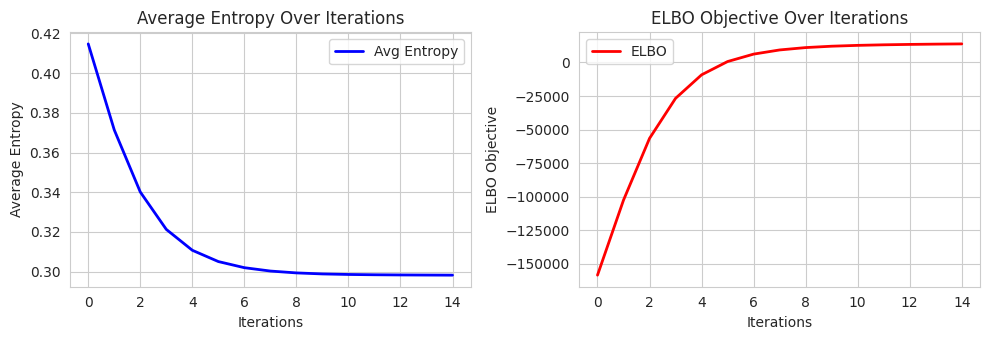

In [ ]:
""" Plotting for Average Entropy and ELBO Objective """